In [ ]:
#Questions asked of this dataset in this notebook
# Who are the riders of Boston?
    #Gender
    #Age
    #Profession/location
#Not shown: I did check other months to see if these trends were consistent
    #Gender: Males remained dominant throughout the months I checked
    #Age: Mean/median remained constant throughout the months I checked
    #Station use varied slightly, but school stations remained most popular

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy
%matplotlib inline

In [175]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data.csv')
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,1.214190e+05,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,1.214190e+05,121419.000000,121419.000000
mean,1.234644e+03,114.707311,42.358157,-71.088969,114.345028,42.357839,-71.087822,3020.227518,1984.443596,1.163426,0.739289,-1.240737,0.739284,-1.240717,-0.000006,0.000020,3.160695e-06,0.000300,1.188911
std,1.853257e+04,91.828251,0.015366,0.024568,92.227295,0.122503,0.205472,902.348086,11.406707,0.521871,0.000268,0.000429,0.002138,0.003586,0.002134,0.003576,1.090537e-03,0.003821,15.113036
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,0.000000,-71.166491,5.000000,1886.000000,0.000000,0.735957,-1.242090,0.000000,-1.242090,-0.739000,-0.002970,0.000000e+00,0.000000,0.000000
25%,3.650000e+02,51.000000,42.348810,-71.104412,49.000000,42.348953,-71.104412,2472.000000,1978.000000,1.000000,0.739126,-1.241006,0.739129,-1.241006,-0.000127,-0.000197,5.280000e-09,0.000145,0.575000
50%,5.910000e+02,87.000000,42.358100,-71.091156,84.000000,42.358100,-71.091156,3176.000000,1988.000000,1.000000,0.739288,-1.240775,0.739288,-1.240775,0.000000,0.000000,1.400000e-08,0.000236,0.937000
75%,9.790000e+02,177.000000,42.365994,-71.069849,177.000000,42.365908,-71.068922,3752.000000,1993.000000,1.000000,0.739426,-1.240403,0.739425,-1.240387,0.000127,0.000215,3.650000e-08,0.000382,1.510000
max,2.146146e+06,374.000000,42.406302,-70.905558,376.000000,42.406302,0.000000,4301.000000,2002.000000,2.000000,0.740130,-1.237535,0.740130,0.000000,0.003840,1.240000,3.800000e-01,1.330000,5260.000000


In [84]:
#Had to email Blue Bikes to ask if male = 1 or 2.
#Are riders disproportionally male or female?
gender = df['gender']
female = 0
male = 0
none = 0
for value in gender:
    if value == 1:
        male += 1
    elif value == 2:
        female += 1
    else:
        none += 1
print(female)
print(male)
print(none)


28077
85108
8234


In [85]:
total_riders = female + male + none
perc_female = (female /total_riders)
perc_male = (male/total_riders)
perc_none = (none/total_riders)
print (perc_female)
print (perc_male)
print (perc_none)

0.23124058013984633
0.700944662696942
0.06781475716321168


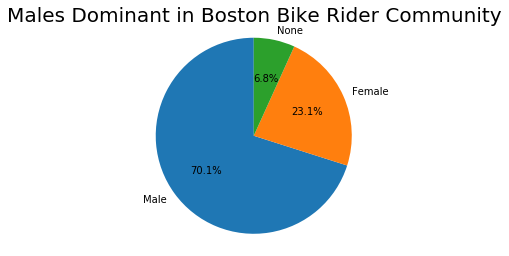

In [141]:
labels = 'Male', 'Female', 'None',
sizes = [perc_male, perc_female , perc_none]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Males Dominant in Boston Bike Rider Community", fontsize=20)

plt.show()

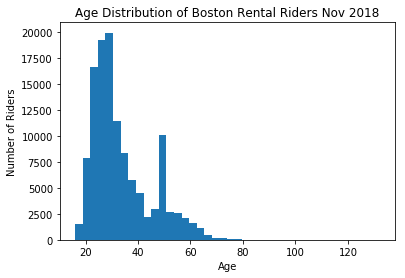

Maximum age is clearly an outlier: 132
Max age birth year: 1886
Minimum age: 16
Mean age: 33.55640385771584
Median age: 30.0


In [87]:
#What is the age distribution of bikers?
birth_year = df['birth year']
ages = 2018 - birth_year
plt.hist(ages, bins = 40)
plt.title('Age Distribution of Boston Rental Riders Nov 2018')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()
print ("Maximum age is clearly an outlier: {}".format(max(ages)))
print ("Max age birth year: {}".format(min(birth_year)))
print ("Minimum age: {}".format(min(ages)))
print ("Mean age: {}".format(ages.mean()))
print ("Median age: {}".format(ages.median()))


In [60]:
#Clearly there is an outlier. I don't believe someone from the 19th century is riding around Boston on a rental bike in 2018.
#Verified oldest person in America's birth year is 1905(113yrs old). Thank you Wikipedia.
#Let's get rid of outliers outside of 5 std to get rid of what is clearly a tech issue with 
#bike software/human registration error.

#Three standard deviations cuts off everyone older than 67. Let's be a bit more conservative
x1 = np.mean(ages) + 3*np.std(ages)
high_std = np.mean(ages) + 5*np.std(ages)
low_std = np.mean(ages) - 5*np.std(ages)

print (x1)
print (high_std)
print (low_std)


67.77638451864978
90.5897049592724
-23.47689724384071


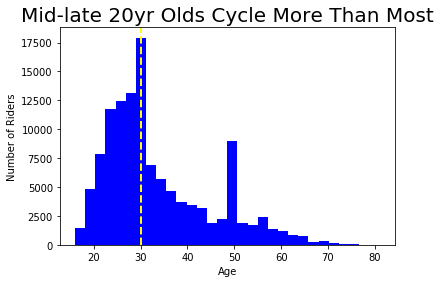

In [107]:
ages_adjusted = ages[ages < high_std]
plt.hist(ages_adjusted, bins = 30, color= 'blue')
plt.title('Mid-late 20yr Olds Cycle More Than Most', fontsize=20)
plt.axvline(np.median(ages), color ='yellow', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()


In [62]:
#What is the adjusted mean/median age of riders? 
print (np.mean(ages_adjusted))
print (np.median(ages_adjusted))

33.532301912905936
30.0


In [ ]:
#What are the most popular stations and can we imply anything about socioeconomics based on station use?

In [160]:
print (df['start station name'].value_counts().head(10))

MIT at Mass Ave / Amherst St                        4246
MIT Stata Center at Vassar St / Main St             3304
Central Square at Mass Ave / Essex St               2822
MIT Pacific St at Purrington St                     2456
South Station - 700 Atlantic Ave                    2268
Kendall T                                           2122
Nashua Street at Red Auerbach Way                   1901
MIT Vassar St                                       1886
One Kendall Square at Hampshire St / Portland St    1718
Harvard Square at Mass Ave/ Dunster                 1629
Name: start station name, dtype: int64


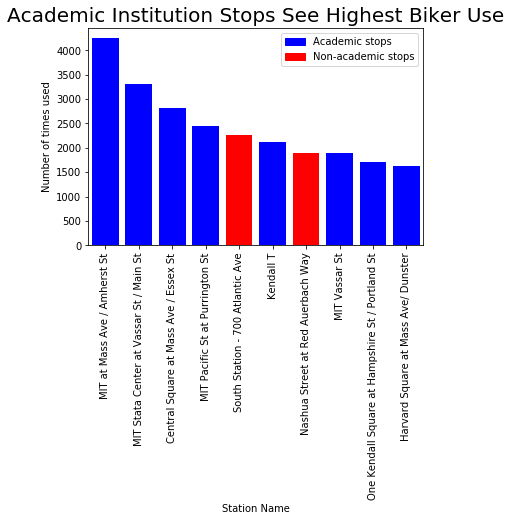

In [177]:
import matplotlib.patches as mpatches
plt.title('Top Used Start Stations in Nov 2018')
plt.xlabel('Station Name')
plt.title('Academic Institution Stops See Highest Biker Use', fontsize = 20)
plt.ylabel('Number of times used')
df['start station name'].value_counts().head(10).plot(kind='bar')
y_pos = [0,1,2,3,4,5,6,7,8,9]
plt.bar(y_pos, height = df['start station name'].value_counts().head(10) , color=['b', 'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b'])

red_bar = mpatches.Patch(color='red', label='Non-academic stops')
blue_bar = mpatches.Patch(color= 'blue', label = 'Academic stops')
plt.legend(handles=[blue_bar, red_bar])


plt.show()

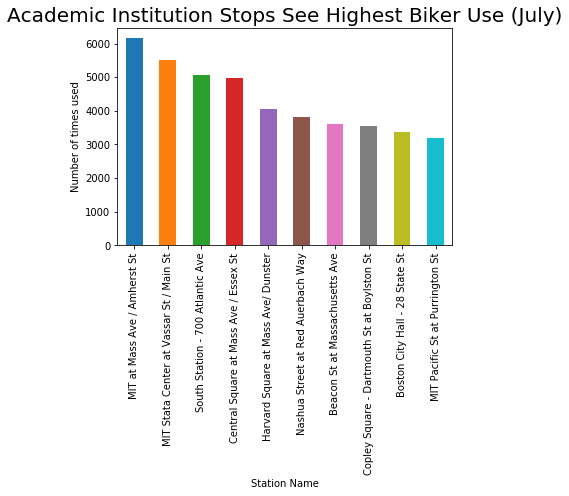

In [173]:
#Although this figure was not used in the final report, this code was used on other months to compare stations to 
#prevent a bias towards students during the school year.
dfjuly = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data July.csv')
plt.title('Academic Institution Stops See Highest Biker Use (July)', fontsize = 20)
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
dfjuly['start station name'].value_counts().head(10).plot(kind='bar')
plt.show()
